In [1]:
# 5.10 高级处理-交叉表与透视表

In [11]:
import pandas as pd

data = pd.read_csv('./stock_day.csv')
# 删除一些列，让数据更简单些，再去做后面的操作
data = data.drop(["ma5","ma10","ma20","v_ma5","v_ma10","v_ma20"], axis=1)
data.index # data的行索引
data

,open,high,close,low,volume,price_change,p_change,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,0.58
2018-02-13,21.40,21.90,21.48,21.31,30802.45,0.28,1.32,0.77
2018-02-12,20.70,21.40,21.19,20.63,32445.39,0.82,4.03,0.81
2018-02-09,21.20,21.46,20.36,20.19,54304.01,-1.50,-6.86,1.36
2018-02-08,21.79,22.09,21.88,21.75,27068.16,0.09,0.41,0.68
2018-02-07,22.69,23.11,21.80,21.29,53853.25,-0.50,-2.24,1.35


In [2]:
# 寻找星期几跟股票张得的关系
# 1、先把对应的日期找到星期几
date = pd.to_datetime(data.index).weekday
data['week'] = date # 将星期几加入到data中
data.tail()

,open,high,close,low,volume,price_change,p_change,turnover,week
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,6.16,4
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,3.19,3
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,2.30,2
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,4.76,1
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,3.30,0


In [3]:
import numpy as np

# 假如把p_change以0为界限去分个类
data['posi_neg'] = np.where(data['p_change']>0,1,0)

# 通过交叉表找寻两列数据的关系
count = pd.crosstab(data['week'],data['posi_neg'])
count

posi_neg,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [4]:
# 先求和 不加 axis=1 默认列方向上求和
sum = count.sum(axis=1).astype(np.float32)
sum

week
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32

In [5]:
# 进行相除操作，得出比例
pro = count.div(sum,axis=0)
pro

posi_neg,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


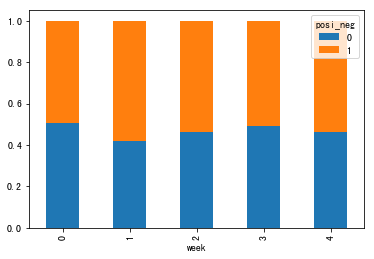

In [9]:
pro.plot(kind='bar',stacked=True)

In [10]:
data.pivot_table(['posi_neg'],index='week')

,posi_neg
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


小结

- 交叉表与透视表的作用【知道】
    - 交叉表：计算一列数据对于另外一列数据的分组个数
    - 透视表：指定某一列对另一列的关系（占比情况）

In [ ]:
# 5.11 高级处理-分组与聚合

In [13]:
col = pd.DataFrame({'color':['white','red','green','red','green'],
             'object':['pen','pencil','pencil','ashtray','pen'],
              'price1':[5.56,4.20,1.30,0.56,2.75],
              'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [14]:
# 分组，求平均值
col.groupby(['color'])['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [16]:
col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [17]:
col.groupby(['color'],as_index=False)['price1'].mean()

,color,price1
0,green,2.025
1,red,2.380
2,white,5.560


In [20]:
# 导入星巴克店的数据
starbucks = pd.read_csv("./directory.csv")
starbucks.tail()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79
25599,Starbucks,47609-253286,Mall of Africa,Licensed,"Shop 2077, Upper Level, Waterfall City",Midrand,GT,ZA,1682,27873500215,GMT+000000 Africa/Johannesburg,28.11,-26.02


In [22]:
count = starbucks.groupby(['Country']).count()
count.tail()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22
AW,3,3,3,3,3,3,3,0,3,3,3,3
AZ,4,4,4,4,4,4,4,3,4,4,4,4
BE,19,19,19,19,19,19,19,19,1,19,19,19
BG,5,5,5,5,5,5,5,1,0,5,5,5


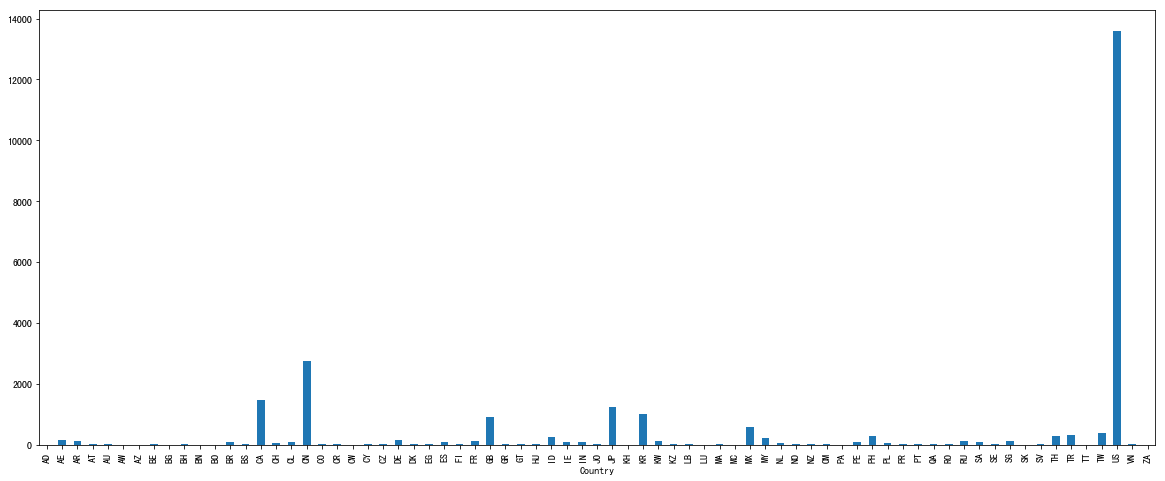

In [23]:
count['Brand'].plot(kind='bar',figsize=(20,8))

In [24]:
starbucks.groupby(['Country','State/Province']).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
        RK                  3             3           3               3   
        SH                  6             6           6               6   
        UQ                  1             1           1               1   
AR      B                  21            21          21              21   
        C                  73            73          73              73   
        M                   5             5           5               5   
        S                   3             3           3               3   
        X                   6             6           6               6   
AT      3                   1             1           1               1   
        5                   3             3           3               3   
        9                  14            14          14              14   
AU      NSW                 9             9           9               9   
        QLD                 8             8           8               8   
        VIC                 5             5           5               5   
AW      AW                  3             3           3               3   
AZ      BA                  3             3           3               3   
        SAB                 1             1           1               1   
BE      BE                  4             4           4               4   
        VAN                 1             1           1               1   
        VBR                 2             2           2               2   
        VLG                10            10          10              10   
        WAL                 2             2           2               2   
BG      2                   1             1           1               1   
        23                  4             4           4               4   
BH      13                 16            16          16              16   
...                       ...           ...         ...             ...   
US      MO                188           188         188             188   
        MS                 32            32          32              32   
        MT                 36            36          36              36   
        NC                338           338         338             338   
        ND                 13            13          13              13   
        NE                 58            58          58              58   
        NH                 29            29          29              29   
        NJ                261           261         261             261   
        NM                 76            76          76              76   
        NV                253           253         253             253   
        NY                645           645         645             645   
        OH                378           378         378             378   
        OK                 79            79          79              79   
        OR                359           359         359             359   
        PA                357           357         357             357   
        RI                 27            27          27              27   
        SC                131           131         131             131   
        SD                 25            25          25              25   
        TN                180           180         180             180   
        TX               1042          1042        1042            1042   
        UT                101           101      